In [ ]:
# Cell 1: K-means clustering on a simple market segmentation dataset

import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

# Fake "market segmentation" data: Age vs Annual Income (in ₹k)
data = {
    "Age":   [19, 21, 20, 23, 31, 35, 38, 40, 42, 50, 52, 48, 27, 29],
    "Income":[15, 18, 17, 20, 40, 45, 48, 52, 55, 70, 72, 68, 35, 38]
}

df = pd.DataFrame(data)

# K-means with k=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init="auto")
df["Cluster"] = kmeans.fit_predict(df[["Age", "Income"]])

print("Cluster centers (Age, Income):")
print(kmeans.cluster_centers_)

print("\nSample clustered data:")
print(df)


Cluster centers (Age, Income):
[[34.57142857 44.71428571]
 [50.         70.        ]
 [20.75       17.5       ]]

Sample clustered data:
    Age  Income  Cluster
0    19      15        2
1    21      18        2
2    20      17        2
3    23      20        2
4    31      40        0
5    35      45        0
6    38      48        0
7    40      52        0
8    42      55        0
9    50      70        1
10   52      72        1
11   48      68        1
12   27      35        0
13   29      38        0


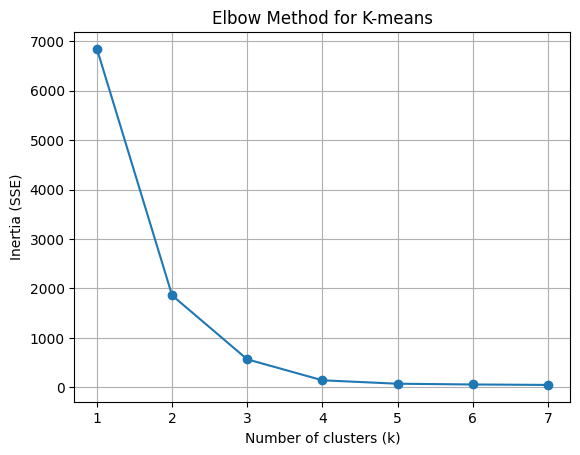

In [ ]:
# Cell 2: Elbow method on the same dataset

import matplotlib.pyplot as plt

X = df[["Age", "Income"]].values

inertias = []
ks = range(1, 8)

for k in ks:
    km = KMeans(n_clusters=k, random_state=42, n_init="auto")
    km.fit(X)
    inertias.append(km.inertia_)   # Sum of squared distances to closest cluster center

plt.figure()
plt.plot(ks, inertias, marker="o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia (SSE)")
plt.title("Elbow Method for K-means")
plt.grid(True)
plt.show()


In [ ]:
# Cell 3: Manual K-means (k=2) for given 6 points, 2 iterations

import numpy as np

# Given data points
points = np.array([
    [185, 72],
    [170, 56],
    [168, 60],
    [179, 68],
    [182, 72],
    [188, 77]
])

# Initial centroids: first two objects
centroids = np.array([
    points[0],  # (185, 72)
    points[1]   # (170, 56)
], dtype=float)

def assign_clusters(points, centroids):
    # Euclidean distance
    dists = np.linalg.norm(points[:, None, :] - centroids[None, :, :], axis=2)
    return np.argmin(dists, axis=1)  # closest centroid index

for it in range(1, 3):  # 2 iterations
    print(f"\n=== Iteration {it} ===")
    clusters = assign_clusters(points, centroids)

    for k in range(2):
        cluster_points = points[clusters == k]
        print(f"\nCluster {k} points:")
        print(cluster_points)

        # Update centroid if cluster not empty
        if len(cluster_points) > 0:
            centroids[k] = cluster_points.mean(axis=0)

    print("\nUpdated centroids:")
    print(centroids)



=== Iteration 1 ===

Cluster 0 points:
[[185  72]
 [179  68]
 [182  72]
 [188  77]]

Cluster 1 points:
[[170  56]
 [168  60]]

Updated centroids:
[[183.5   72.25]
 [169.    58.  ]]

=== Iteration 2 ===

Cluster 0 points:
[[185  72]
 [179  68]
 [182  72]
 [188  77]]

Cluster 1 points:
[[170  56]
 [168  60]]

Updated centroids:
[[183.5   72.25]
 [169.    58.  ]]
